# Atividade 01 - Parte 01 - Inventário de emissões utilizando Python

Aluno: Leonardo Hoinaski


## Abrir planilha de fatores de emissões compilada.
Utilizei o capítulo 11.7 da AP42, pois meu empreendimento é uma Cimenteira. 
https://www.epa.gov/sites/default/files/2020-10/documents/c11s07.pdf

In [2]:
# Utilizando Pandas para abrir a planilha
import pandas as pd
import os

# Coletando o caminho da pasta que estou
cwd = os.getcwd()

# Pasta dos fatores de emissão
path = cwd+'\\tabelas\\FE'
print(path)

# Indicando nome do arquivo
chapterNumer = 11
subChapter = 7
file = 'chp_'+str(chapterNumer)+'_'+str(subChapter)+'.csv'
print(file)

# Abrindo arquivo utilizando o Pandas
fe = pd.read_csv(path + '\\'+file)
print(fe)


C:\Users\Leonardo.Hoinaski\Documents\ENS5173_202401\tabelas\FE
chp_11_7.csv
                                              Source    PM  Lead   SO2   NOX  \
0  Comminution--raw material crushing and screeni...  0.12   NaN   NaN   NaN   
1                                              Dryer  2.30   NaN   NaN   NaN   
2                                             Cooler  0.11   NaN   NaN   NaN   
3                     Firing--natural gas-fired kiln   NaN   NaN  44.0  0.54   

    CO    CO2   VOC    HF  Fluorides  
0  NaN    NaN   NaN   NaN        NaN  
1  NaN    NaN   NaN   NaN        NaN  
2  NaN    NaN   NaN   NaN        NaN  
3  3.3  780.0  0.43  0.46       0.56  


<Axes: >

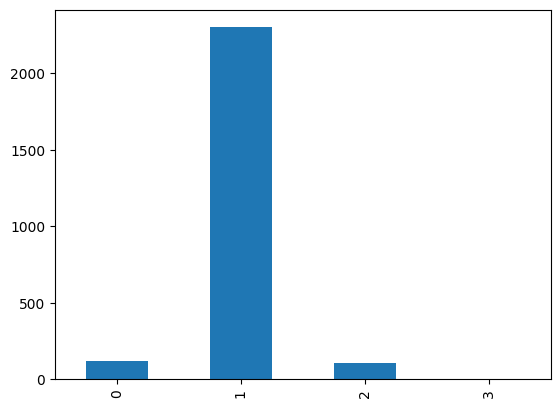

In [9]:
# Plotando os fatores de emissão
import matplotlib.pyplot as plt

atv = 1000 # Considerando uma taxa de atividade
emis = fe['PM']*atv

fig,ax = plt.subplots()
emis.plot.bar(ax=ax,x='Source')